In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe

<bound method NDFrame.describe of       age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]>

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
# lets drop duplicate
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

LETS DO UNIVARIABLE ANALYSIS

In [8]:
# get categorical columns
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['sex', 'smoker', 'region'], dtype='object')

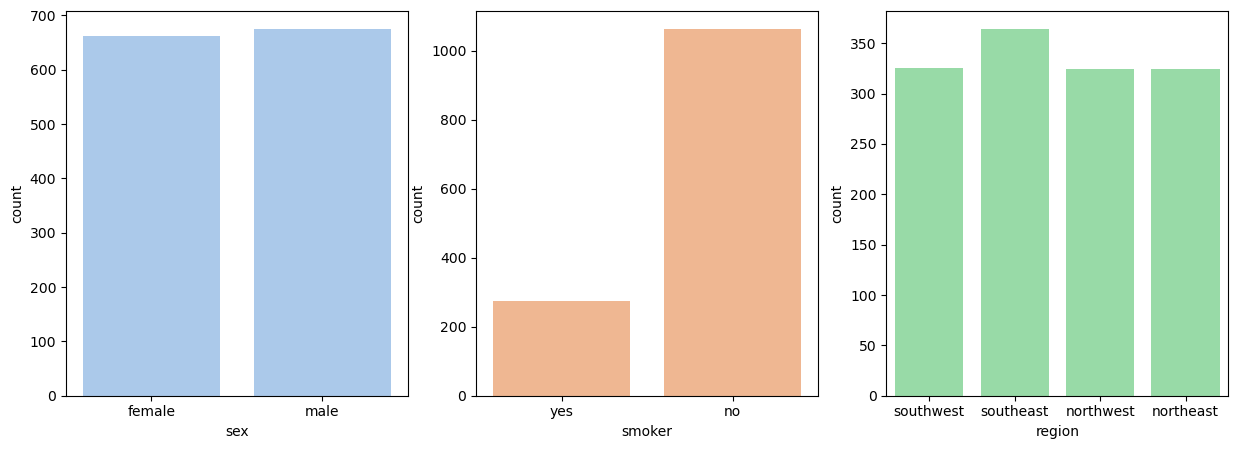

In [9]:
# lets have a sub plots on catagorical columns
color = sns.color_palette('pastel')[0:3]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='sex', data=df, ax=ax[0], color=color[0])
sns.countplot(x='smoker', data=df, ax=ax[1], color=color[1])
sns.countplot(x='region', data=df, ax=ax[2], color=color[2])
plt.show()

In [10]:
# numerical feature
df.select_dtypes(include='number').columns

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

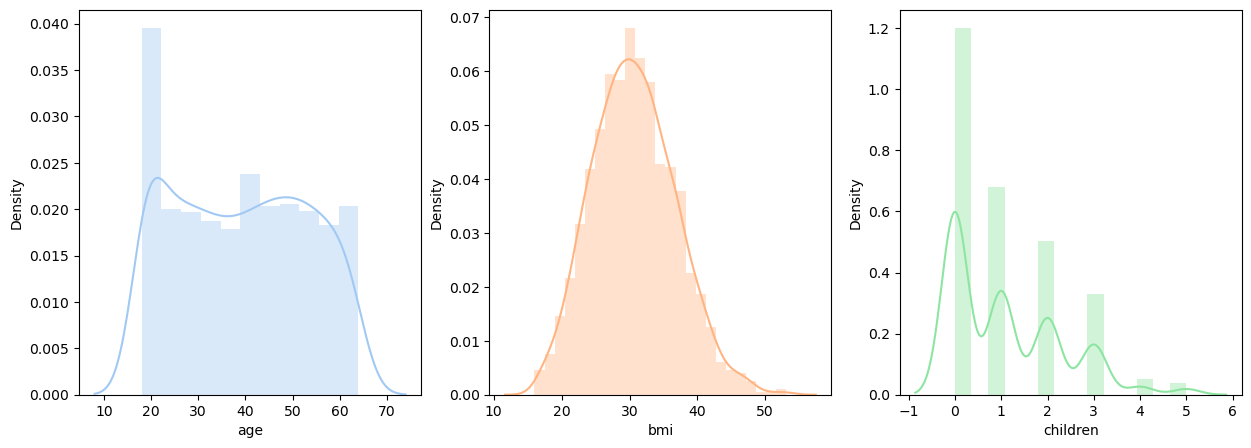

In [11]:
# lets get distplot on numerical columns
color = sns.color_palette('pastel')[0:3]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.distplot(df['age'], ax=ax[0], color=color[0])
sns.distplot(df['bmi'], ax=ax[1], color=color[1])
sns.distplot(df['children'], ax=ax[2], color=color[2])
plt.show()

BI VARIABLE ANALYSIS

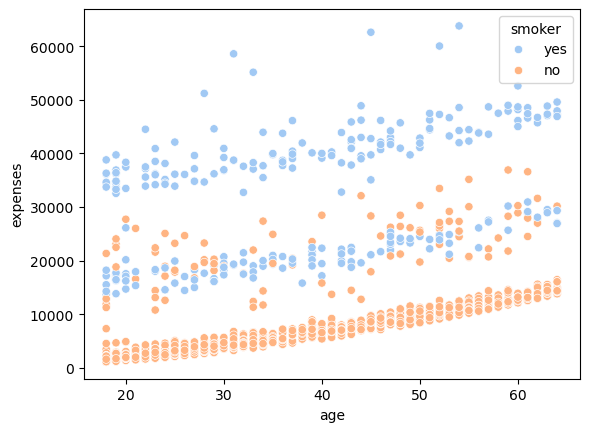

In [12]:
# LETS GET THE SCATTERPLOT BETWEEN AGE AND EXPENSES
sns.scatterplot(x='age', y='expenses', data=df, hue='smoker', palette='pastel');
plt.show()

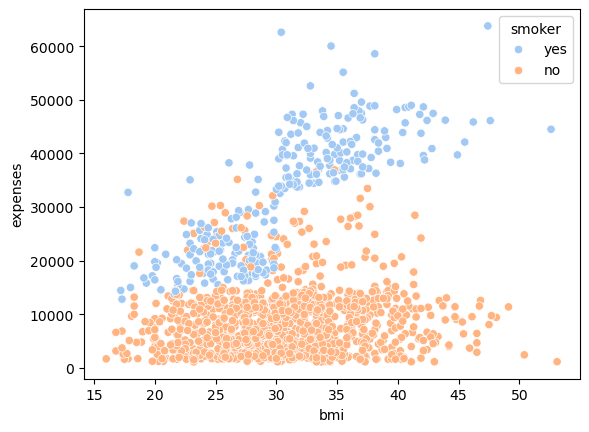

In [13]:
# LETS THE SCATTERPLOT BETWEEN BMI AND EXPENSES
sns.scatterplot(x='bmi', y='expenses', data=df, hue='smoker', palette='pastel');
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [15]:
# get dummies
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,True,False,True,False,False


In [16]:
x = df.drop('expenses', axis=1)
y = df['expenses']

In [17]:
# split the  train and test data set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

x_train.shape, x_test.shape


((1069, 8), (268, 8))

In [18]:
# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
from sklearn.metrics import r2_score
LR_accuracy=r2_score(y_test,model.predict(x_test))*100
LR_accuracy


80.69099329048419

In [19]:
# POLYNOMIAL FEATURES
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
Poly_Accuracy = round(poly_model.score(x_test_poly, y_test)*100)
Poly_Accuracy

88

In [20]:
# decision tree regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
from sklearn.metrics import r2_score
DTR_Accuracy=round(r2_score(y_test, model.predict(x_test)) * 100)
DTR_Accuracy

81

In [21]:
# support vector regression
from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)
from sklearn.metrics import r2_score
SVR_Accuracy=round(r2_score(y_test, model.predict(x_test)) * 100)
SVR_Accuracy

-13

In [22]:
# random forses regressor with estimate
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10)
model.fit(x_train, y_train)
from sklearn.metrics import r2_score
RFR_Accuracy=round(r2_score(y_test, model.predict(x_test)) * 100)
RFR_Accuracy

88

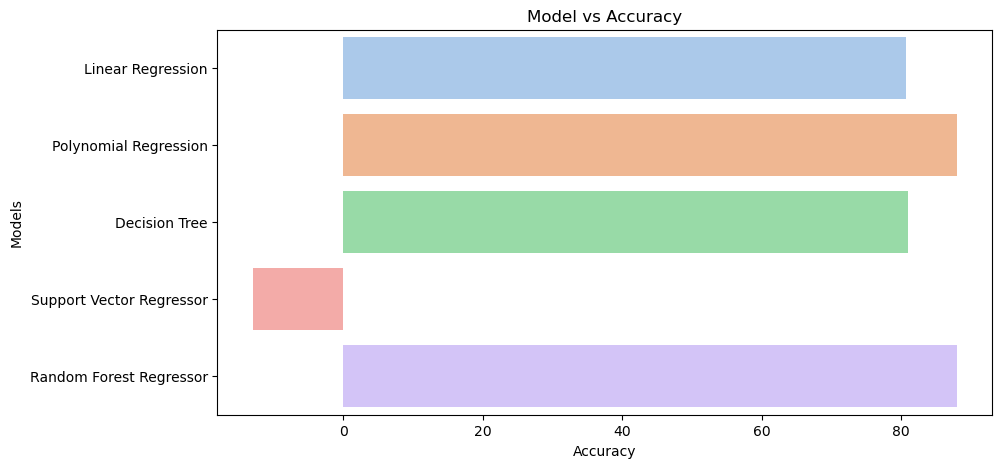

In [23]:
#lets the accuracies in a bar graph
models=['Linear Regression','Polynomial Regression','Decision Tree','Support Vector Regressor','Random Forest Regressor']
accuracy=[LR_accuracy,Poly_Accuracy,DTR_Accuracy,SVR_Accuracy,RFR_Accuracy]
plt.figure(figsize=(10,5))
sns.barplot(x=accuracy,y=models,palette='pastel')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Model vs Accuracy')
plt.show()


In [24]:
# use polynomial model to predict new input
new_data = pd.DataFrame({'age': [25], 'bmi': [30.5], 'children': [2], 'sex_male': [1], 'smoker_yes': [0], 'region_northwest': [0], 'region_southeast': [0], 'region_southwest': [1]})
#new_data
new_data = poly.transform(new_data)
new_data
poly_model.predict(new_data)

array([4109.765625])

In [25]:
# save polynomial regression model
import pickle
pickle.dump(poly_model, open('poly_model.pkl', 'wb'))